In [ ]:
import pandas as pd
import numpy as np

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import ace_tools_open as tools
import ast

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import silhouette_scoreWordCloud
from sklearn.metrics import 
from scipy.sparse import hstack
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import norm


In [2]:
data = pd.read_csv('Product Review Large Data.csv')
data

id       asins     brand  \
0      AVpe7AsMilAPnD_xQ78G  B00QJDU3KY    Amazon   
1      AVpe7AsMilAPnD_xQ78G  B00QJDU3KY    Amazon   
2      AVpe7AsMilAPnD_xQ78G  B00QJDU3KY    Amazon   
3      AVpe7AsMilAPnD_xQ78G  B00QJDU3KY    Amazon   
4      AVpe7AsMilAPnD_xQ78G  B00QJDU3KY    Amazon   
...                     ...         ...       ...   
10966      ACCEVQZABYWJHRHF         NaN  Flipkart   
10967      ACCEVQZABYWJHRHF         NaN  Flipkart   
10968      ACCEVQZABYWJHRHF         NaN  Flipkart   
10969      ACCEVQZABYWJHRHF         NaN  Flipkart   
10970      ACCEVQZABYWJHRHF         NaN  Flipkart   

                                              categories colors  \
0                             Amazon Devices,mazon.co.uk    NaN   
1                             Amazon Devices,mazon.co.uk    NaN   
2                             Amazon Devices,mazon.co.uk    NaN   
3                             Amazon Devices,mazon.co.uk    NaN   
4                             Amazon Devices,mazon.co.uk    NaN   
...                                                  ...    ...   
10966  Flipkart Headphone, Devices & Accessories, Blu...    NaN   
10967  Flipkart Headphone, Devices & Accessories, Blu...    NaN   
10968  Flipkart Headphone, Devices & Accessories, Blu...    NaN   
10969  Flipkart Headphone, Devices & Accessories, Blu...    NaN   
10970  Flipkart Headphone, Devices & Accessories, Blu...    NaN   

                  dateAdded           dateUpdated                 dimension  \
0      2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
1      2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
2      2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
3      2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
4      2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
...                     ...                   ...                       ...   
10966  2019-07-02T14:40:43Z  2020-08-33T08:28:46Z                       NaN   
10967  2019-07-02T14:40:43Z  2020-08-33T08:28:46Z                       NaN   
10968  2019-07-02T14:40:43Z  2020-08-33T08:28:46Z                       NaN   
10969  2019-07-02T14:40:43Z  2020-08-33T08:28:46Z                       NaN   
10970  2019-07-02T14:40:43Z  2020-08-33T08:28:46Z                       NaN   

       ean                         keys  ... reviews.rating  \
0      NaN  kindlepaperwhite/b00qjdu3ky  ...            5.0   
1      NaN  kindlepaperwhite/b00qjdu3ky  ...            5.0   
2      NaN  kindlepaperwhite/b00qjdu3ky  ...            4.0   
3      NaN  kindlepaperwhite/b00qjdu3ky  ...            5.0   
4      NaN  kindlepaperwhite/b00qjdu3ky  ...            5.0   
...    ...                          ...  ...            ...   
10966  NaN                          NaN  ...            4.0   
10967  NaN                          NaN  ...            5.0   
10968  NaN                          NaN  ...            4.0   
10969  NaN                          NaN  ...            5.0   
10970  NaN                          NaN  ...            5.0   

                                      reviews.sourceURLs  \
0      https://www.amazon.com/Kindle-Paperwhite-High-...   
1      https://www.amazon.com/Kindle-Paperwhite-High-...   
2      https://www.amazon.com/Kindle-Paperwhite-High-...   
3      https://www.amazon.com/Kindle-Paperwhite-High-...   
4      https://www.amazon.com/Kindle-Paperwhite-High-...   
...                                                  ...   
10966                                                NaN   
10967                                                NaN   
10968                                                NaN   
10969                                                NaN   
10970                                                NaN   

                                            reviews.text  \
0      I initially had trouble deciding between the p...   
1      Allow me to preface this with

In [3]:
print(data.columns)

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


### select target columns
•	“Categories”
•	“name”
•	“prices”
•	“reviews.text”
•	“reviews.title”
•	“reviews.rating”


In [4]:
df = data[['id', 'categories',  'name', 'prices', 'reviews.text', 'reviews.title','reviews.rating']]
df

id  \
0      AVpe7AsMilAPnD_xQ78G   
1      AVpe7AsMilAPnD_xQ78G   
2      AVpe7AsMilAPnD_xQ78G   
3      AVpe7AsMilAPnD_xQ78G   
4      AVpe7AsMilAPnD_xQ78G   
...                     ...   
10966      ACCEVQZABYWJHRHF   
10967      ACCEVQZABYWJHRHF   
10968      ACCEVQZABYWJHRHF   
10969      ACCEVQZABYWJHRHF   
10970      ACCEVQZABYWJHRHF   

                                              categories               name  \
0                             Amazon Devices,mazon.co.uk  Kindle Paperwhite   
1                             Amazon Devices,mazon.co.uk  Kindle Paperwhite   
2                             Amazon Devices,mazon.co.uk  Kindle Paperwhite   
3                             Amazon Devices,mazon.co.uk  Kindle Paperwhite   
4                             Amazon Devices,mazon.co.uk  Kindle Paperwhite   
...                                                  ...                ...   
10966  Flipkart Headphone, Devices & Accessories, Blu...                NaN   
10967  Flipkart Headphone, Devices & Accessories, Blu...                NaN   
10968  Flipkart Headphone, Devices & Accessories, Blu...                NaN   
10969  Flipkart Headphone, Devices & Accessories, Blu...                NaN   
10970  Flipkart Headphone, Devices & Accessories, Blu...                NaN   

                                                  prices  \
0      [{"amountMax":139.99,"amountMin":139.99,"curre...   
1      [{"amountMax":139.99,"amountMin":139.99,"curre...   
2      [{"amountMax":139.99,"amountMin":139.99,"curre...   
3      [{"amountMax":139.99,"amountMin":139.99,"curre...   
4      [{"amountMax":139.99,"amountMin":139.99,"curre...   
...                                                  ...   
10966                                                NaN   
10967                                                NaN   
10968                                                NaN   
10969                                                NaN   
10970                                                NaN   

                                            reviews.text  \
0      I initially had trouble deciding between the p...   
1      Allow me to preface this with a little history...   
2      I am enjoying it so far. Great for reading. Ha...   
3      I bought one of the first Paperwhites and have...   
4      I have to say upfront - I don't like coroporat...   
...                                                  ...   
10966  this head phnes give good base in pluged ears ...   
10967  This so far is one of the best headphones I've...   
10968  I am a BASS LOVER and all others like me read ...   
10969  After use of one month........ It is an excell...   
10970  Excellent quality. it works so good. super hap...   

                                    reviews.title  reviews.rating  
0                  Paperwhite voyage, no regrets!             5.0  
1               One Simply Could Not Ask For More             5.0  
2      Great for those that just want an e-reader             4.0  
3                        Love / Hate relationship             5.0  
4                                       I LOVE IT             5.0  
...                                           ...             ...  
10966                        Good quality product             4.0  
10967                                     Awesome             5.0  
10968                                 Really Nice             4.0  
10969                                      Super!             5.0  
10970                                   Fabulous!             5.0  

[10971 rows x 7 columns]

In [5]:
df = data[['id', 'categories',  'name', 'prices', 'reviews.text', 'reviews.title','reviews.rating']]
# cleaning the code 
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Drop rows with missing critical values
df = df.dropna(subset=['categories', 'name', 'reviews.text', 'reviews.rating'])
df

id                                         categories  \
0     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
1     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
2     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
3     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
4     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
...                    ...                                                ...   
1592  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   
1593  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   
1594  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   
1595  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   
1596  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   

                                                   name  \
0                                     Kindle Paperwhite   
1                                     Kindle Paperwhite   
2                                     Kindle Paperwhite   
3                                     Kindle Paperwhite   
4                                     Kindle Paperwhite   
...                                                 ...   
1592  Alexa Voice Remote for Amazon Fire TV and Fire...   
1593  Alexa Voice Remote for Amazon Fire TV and Fire...   
1594  Alexa Voice Remote for Amazon Fire TV and Fire...   
1595  Alexa Voice Remote for Amazon Fire TV and Fire...   
1596  Alexa Voice Remote for Amazon Fire TV and Fire...   

                                                 prices  \
0     [{"amountMax":139.99,"amountMin":139.99,"curre...   
1     [{"amountMax":139.99,"amountMin":139.99,"curre...   
2     [{"amountMax":139.99,"amountMin":139.99,"curre...   
3     [{"amountMax":139.99,"amountMin":139.99,"curre...   
4     [{"amountMax":139.99,"amountMin":139.99,"curre...   
...                                                 ...   
1592  [{"amountMax":29.99,"amountMin":29.99,"currenc...   
1593  [{"amountMax":29.99,"amountMin":29.99,"currenc...   
1594  [{"amountMax":29.99,"amountMin":29.99,"currenc...   
1595  [{"amountMax":29.99,"amountMin":29.99,"currenc...   
1596  [{"amountMax":29.99,"amountMin":29.99,"currenc...   

                                           reviews.text  \
0     I initially had trouble deciding between the p...   
1     Allow me to preface this with a little history...   
2     I am enjoying it so far. Great for reading. Ha...   
3     I bought one of the first Paperwhites and have...   
4     I have to say upfront - I don't like coroporat...   
...                                                 ...   
1592  This is not the same remote that I got for my ...   
1593  I have had to change the batteries in this rem...   
1594  Remote did not activate, nor did it connect to...   
1595  It does the job but is super over priced. I fe...   
1596  I ordered this item to replace the one that no...   

                                          reviews.title  reviews.rating  
0                        Paperwhite voyage, no regrets!             5.0  
1                     One Simply Could Not Ask For More             5.0  
2            Great for those that just want an e-reader             4.0  
3                              Love / Hate relationship             5.0  
4                                             I LOVE IT             5.0  
...                                                 ...             ...  
1592  I would be disappointed with myself if i produ...             3.0  
1593                        Battery draining remote!!!!             1.0  
1594      replacing an even worse remote. Waste of time             1.0  
1595                                         Overpriced             3.0  
1596  I am sending all of this crap back to amazon a...             1.0  

[1177 rows x 7 columns]

In [6]:
# -----------------------------
# 1. VADER Sentiment Analysis
# -----------------------------
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = sia.polarity_scores(text)
    compound = score["compound"]
    if compound >= 0.4:
        return "positive"
    elif compound <= -0.4:
        return "negative"
    else:
        return "neutral"

df["nltk_sentiment"] = df["reviews.text"].apply(get_vader_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ryoji/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# -----------------------------
# 2. LSTM Sentiment Analysis
# -----------------------------
# Label encode target sentiment from ratings
df["label"] = df["reviews.rating"].apply(lambda x: 2 if x >= 4 else (0 if x <= 2 else 1))

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["reviews.text"])
sequences = tokenizer.texts_to_sequences(df["reviews.text"])
padded = pad_sequences(sequences, padding='post', maxlen=500)

X_train, X_test, y_train, y_test = train_test_split(padded, df["label"], test_size=0.2, random_state=42)

# Build and train model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=200),
    LSTM(64),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=2, verbose=1)

# Predict all reviews
pred = np.argmax(model.predict(padded), axis=1)
df["lstm_sentiment"] = pd.Series(pred).map({0: "negative", 1: "neutral", 2: "positive"})


Epoch 1/5


/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


471/471 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.8068 - loss: 0.6757
Epoch 2/5
471/471 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.8162 - loss: 0.6253
Epoch 3/5
471/471 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.8324 - loss: 0.5887
Epoch 4/5
471/471 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.8188 - loss: 0.6228
Epoch 5/5
471/471 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.8192 - loss: 0.6102
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


🔍 Sample reviews with mismatches:

    reviews.rating true_sentiment nltk_sentiment lstm_sentiment  \
16             4.0       positive        neutral       positive   
18             4.0       positive        neutral       positive   
51             3.0        neutral        neutral       positive   
52             3.0        neutral        neutral       positive   
96             5.0       positive        neutral       positive   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

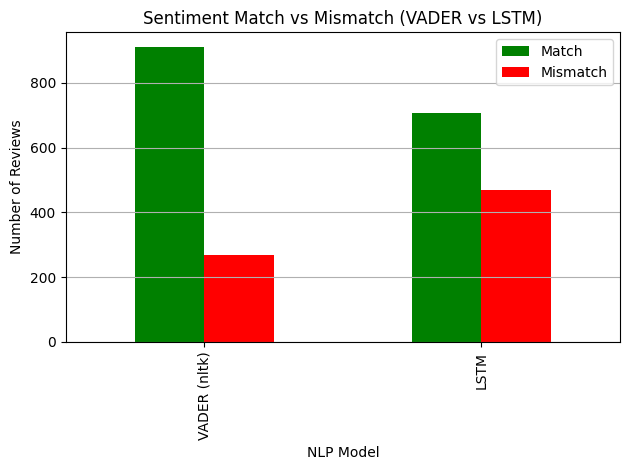

In [47]:
# -----------------------------
# 3. Rating-based Sentiment (Ground Truth)
# -----------------------------
df["true_sentiment"] = df["label"].map({0: "negative", 1: "neutral", 2: "positive"})

# -----------------------------
# 4. Comparison DataFrame
# -----------------------------
df_comparison = df[["reviews.text", "reviews.rating", "true_sentiment", "nltk_sentiment", "lstm_sentiment"]].copy()

# Find mismatches
df_comparison["nltk_mismatch"] = df_comparison["nltk_sentiment"] != df_comparison["true_sentiment"]
df_comparison["lstm_mismatch"] = df_comparison["lstm_sentiment"] != df_comparison["true_sentiment"]

# -----------------------------
# 5. Show Mismatch Examples
# -----------------------------
print("🔍 Sample reviews with mismatches:\n")
pd.set_option('display.max_colwidth', None)

mismatches = df_comparison[
    (df_comparison["nltk_mismatch"]) |
    (df_comparison["lstm_mismatch"])
]

print(mismatches[["reviews.rating", "true_sentiment", "nltk_sentiment", "lstm_sentiment", "reviews.text"]].head(5))

# -----------------------------
# 6. Visual Mismatch Comparison
# -----------------------------
mismatch_counts = pd.DataFrame({
    "NLP Model": ["VADER (nltk)", "LSTM"],
    "Match": [
        (~df_comparison["nltk_mismatch"]).sum(),
        (~df_comparison["lstm_mismatch"]).sum()
    ],
    "Mismatch": [
        df_comparison["nltk_mismatch"].sum(),
        df_comparison["lstm_mismatch"].sum()
    ]
})

mismatch_counts.set_index("NLP Model")[["Match", "Mismatch"]].plot(kind="bar", color=["green", "red"])
plt.title("Sentiment Match vs Mismatch (VADER vs LSTM)")
plt.ylabel("Number of Reviews")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

### Q.1

### To know the categories and product names with best and worst reviews


In [10]:
df = data[['id', 'categories',  'name', 'prices', 'reviews.text', 'reviews.title','reviews.rating']]
# cleaning the code 
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Drop rows with missing critical values
df = df.dropna(subset=['categories', 'name', 'reviews.text', 'reviews.rating'])
df

id                                         categories  \
0     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
1     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
2     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
3     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
4     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
...                    ...                                                ...   
1592  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   
1593  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   
1594  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   
1595  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   
1596  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   

                                                   name  \
0                                     Kindle Paperwhite   
1                                     Kindle Paperwhite   
2                                     Kindle Paperwhite   
3                                     Kindle Paperwhite   
4                                     Kindle Paperwhite   
...                                                 ...   
1592  Alexa Voice Remote for Amazon Fire TV and Fire...   
1593  Alexa Voice Remote for Amazon Fire TV and Fire...   
1594  Alexa Voice Remote for Amazon Fire TV and Fire...   
1595  Alexa Voice Remote for Amazon Fire TV and Fire...   
1596  Alexa Voice Remote for Amazon Fire TV and Fire...   

                                                 prices  \
0     [{"amountMax":139.99,"amountMin":139.99,"curre...   
1     [{"amountMax":139.99,"amountMin":139.99,"curre...   
2     [{"amountMax":139.99,"amountMin":139.99,"curre...   
3     [{"amountMax":139.99,"amountMin":139.99,"curre...   
4     [{"amountMax":139.99,"amountMin":139.99,"curre...   
...                                                 ...   
1592  [{"amountMax":29.99,"amountMin":29.99,"currenc...   
1593  [{"amountMax":29.99,"amountMin":29.99,"currenc...   
1594  [{"amountMax":29.99,"amountMin":29.99,"currenc...   
1595  [{"amountMax":29.99,"amountMin":29.99,"currenc...   
1596  [{"amountMax":29.99,"amountMin":29.99,"currenc...   

                                           reviews.text  \
0     I initially had trouble deciding between the p...   
1     Allow me to preface this with a little history...   
2     I am enjoying it so far. Great for reading. Ha...   
3     I bought one of the first Paperwhites and have...   
4     I have to say upfront - I don't like coroporat...   
...                                                 ...   
1592  This is not the same remote that I got for my ...   
1593  I have had to change the batteries in this rem...   
1594  Remote did not activate, nor did it connect to...   
1595  It does the job but is super over priced. I fe...   
1596  I ordered this item to replace the one that no...   

                                          reviews.title  reviews.rating  
0                        Paperwhite voyage, no regrets!             5.0  
1                     One Simply Could Not Ask For More             5.0  
2            Great for those that just want an e-reader             4.0  
3                              Love / Hate relationship             5.0  
4                                             I LOVE IT             5.0  
...                                                 ...             ...  
1592  I would be disappointed with myself if i produ...             3.0  
1593                        Battery draining remote!!!!             1.0  
1594      replacing an even worse remote. Waste of time             1.0  
1595                                         Overpriced             3.0  
1596  I am sending all of this crap back to amazon a...             1.0  

[1177 rows x 7 columns]

In [12]:
# Compute total reviews per product
df_review_counts = df.groupby(['categories', 'name'])['reviews.rating'].count().reset_index(name='total_reviews')

# Compute 5-star and 1-star counts
df_5star = df[df['reviews.rating'] == 5.0].groupby(['categories', 'name']).size().reset_index(name='five_star_count')
df_1star = df[df['reviews.rating'] == 1.0].groupby(['categories', 'name']).size().reset_index(name='one_star_count')

# Merge with total review counts
df_merged = df_review_counts.merge(df_5star, on=['categories', 'name'], how='left').merge(df_1star, on=['categories', 'name'], how='left')

# Fill missing values with 0
df_merged.fillna(0, inplace=True)

# Compute proportions
df_merged['five_star_ratio'] = df_merged['five_star_count'] / df_merged['total_reviews']
df_merged['one_star_ratio'] = df_merged['one_star_count'] / df_merged['total_reviews']

# Identify best-rated products (highest 5-star proportion)
best_reviews = df_merged.sort_values(by='five_star_ratio', ascending=False).head(10)

# Identify worst-rated products (highest 1-star proportion)
worst_reviews = df_merged.sort_values(by='one_star_ratio', ascending=False).head(10)

In [13]:
worst_reviews

categories  \
30  Amazon Devices & Accessories,Amazon Device Acc...   
31  Amazon Devices & Accessories,Amazon Device Acc...   
55  Cell Phones & Accessories,Accessories,Screen P...   
21                                     Amazon Devices   
14                                     Amazon Devices   
42                        Amazon Devices,Kindle Store   
29  Amazon Devices & Accessories,Amazon Device Acc...   
34  Amazon Devices & Accessories,Amazon Device Acc...   
53  Categories,Amazon Devices,Electronics Features...   
5                                      Amazon Devices   

                                                 name  total_reviews  \
30  Alexa Voice Remote for Amazon Fire TV and Fire...             12   
31        Replacement Remote for Amazon Fire TV Stick             17   
55  Moshi Anti-Glare No Bubble Screen Protector fo...             12   
21                           Fire Kids Edition Tablet              3   
14      Certified Refurbished Kindle E-reader - Black              7   
42  All-New Amazon Fire 7 Tablet Case (7th Generation             27   
29    Alexa Voice Remote for Amazon Echo and Echo Dot              7   
34  Amazon 5W USB Official OEM Charger and Power A...             19   
53                                     Amazon Fire TV             44   
5                      Amazon Fire TV Game Controller             11   

    five_star_count  one_star_count  five_star_ratio  one_star_ratio  
30              0.0             5.0         0.000000        0.416667  
31              4.0             7.0         0.235294        0.411765  
55              6.0             4.0         0.500000        0.333333  
21              0.0             1.0         0.000000        0.333333  
14              3.0             2.0         0.428571        0.285714  
42             14.0             4.0         0.518519        0.148148  
29              3.0             1.0         0.428571        0.142857  
34             10.0             2.0         0.526316        0.105263  
53             26.0             4.0         0.590909        0.090909  
5               6.0             1.0         0.545455        0.090909

In [14]:

# Display results
tools.display_dataframe_to_user(name="Best Reviewed Categories and Products", dataframe=best_reviews)
tools.display_dataframe_to_user(name="Worst Reviewed Categories and Products", dataframe=worst_reviews)

Best Reviewed Categories and Products


Worst Reviewed Categories and Products


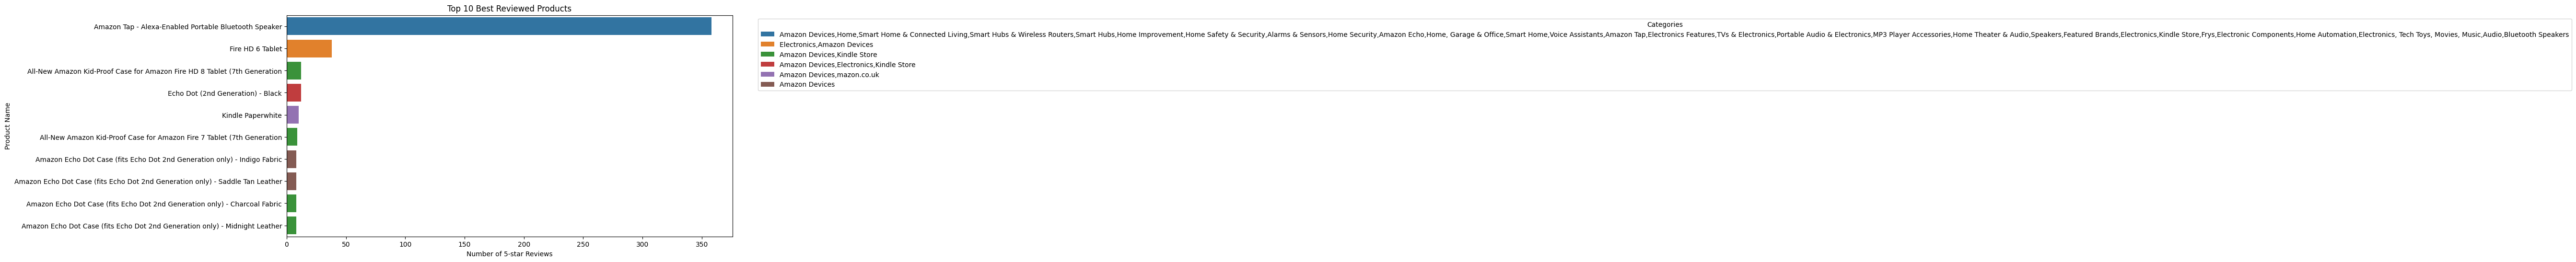

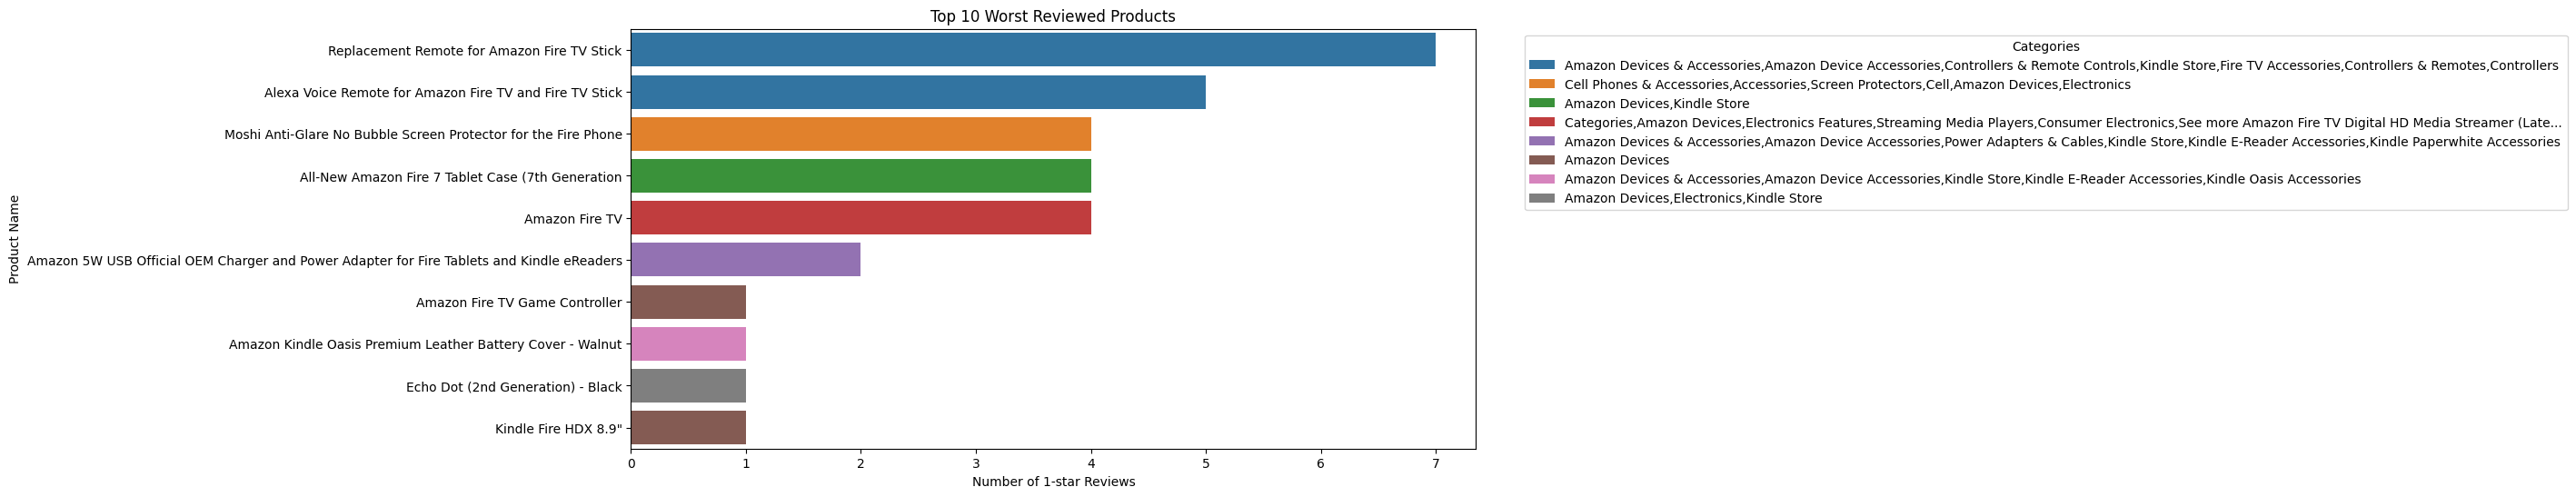

In [17]:
# Sort data in descending order
best_reviews_sorted = best_reviews.sort_values(by='five_star_count', ascending=False).head(10)
worst_reviews_sorted = worst_reviews.sort_values(by='one_star_count', ascending=False).head(10)

# Plot best-reviewed products
plt.figure(figsize=(12, 6))
sns.barplot(data=best_reviews_sorted, x='five_star_count', y='name', hue='categories', dodge=False)
plt.xlabel("Number of 5-star Reviews")
plt.ylabel("Product Name")
plt.title("Top 10 Best Reviewed Products")
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot worst-reviewed products
plt.figure(figsize=(12, 6))
sns.barplot(data=worst_reviews_sorted, x='one_star_count', y='name', hue='categories', dodge=False)
plt.xlabel("Number of 1-star Reviews")
plt.ylabel("Product Name")
plt.title("Top 10 Worst Reviewed Products")
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Best Reviewed Categories and Products


Worst Reviewed Categories and Products


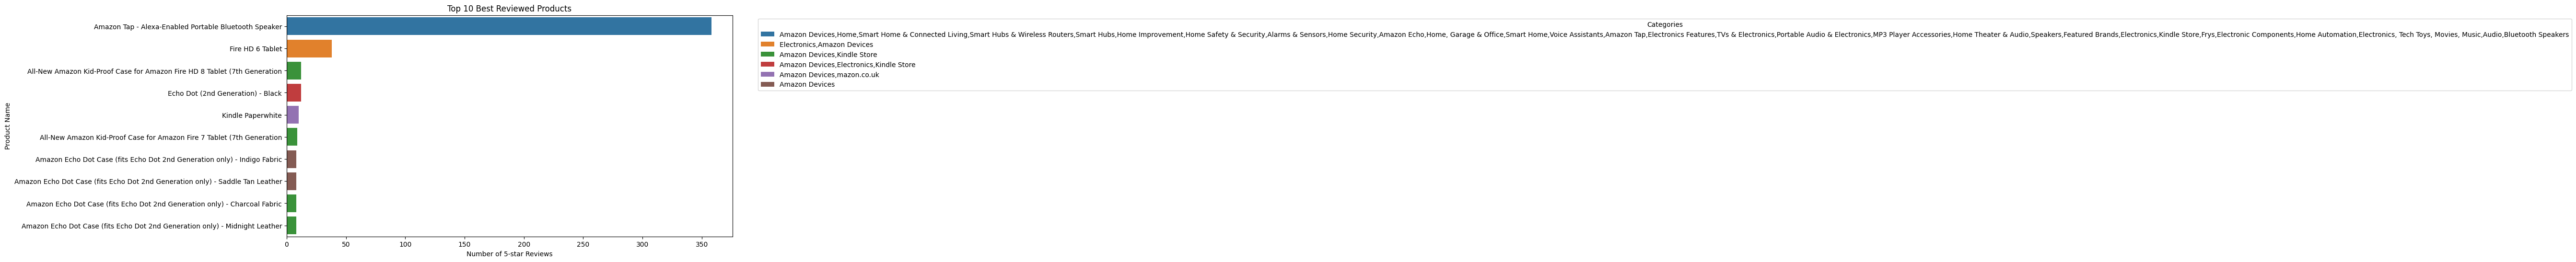

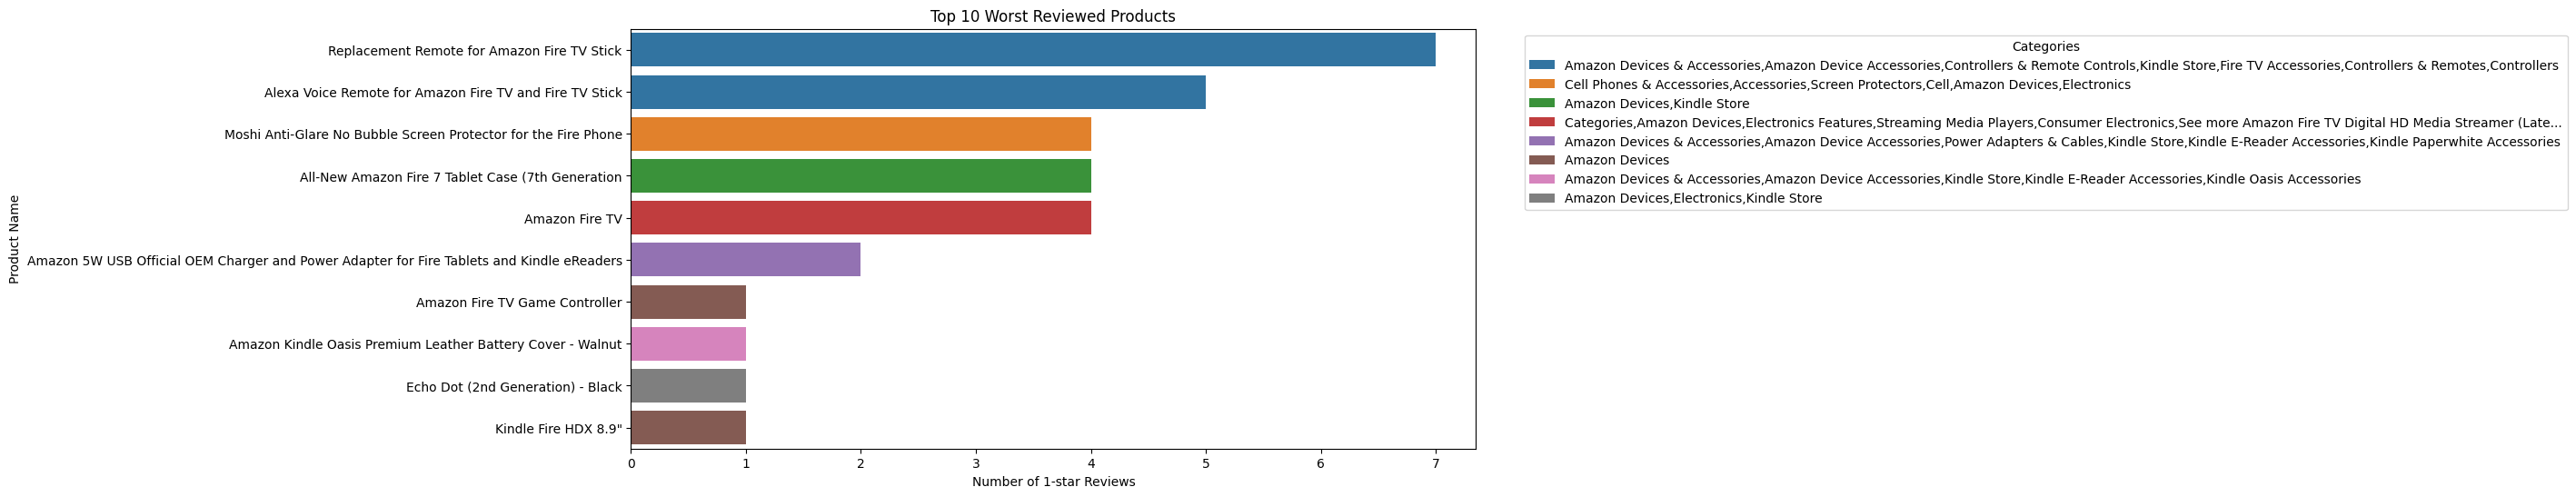

In [18]:
# Compute total reviews per product
df_review_counts = df.groupby(['categories', 'name'])['reviews.rating'].count().reset_index(name='total_reviews')

# Compute 5-star and 1-star counts
df_5star = df[df['reviews.rating'] == 5.0].groupby(['categories', 'name']).size().reset_index(name='five_star_count')
df_1star = df[df['reviews.rating'] == 1.0].groupby(['categories', 'name']).size().reset_index(name='one_star_count')

# Merge with total review counts
df_merged = df_review_counts.merge(df_5star, on=['categories', 'name'], how='left').merge(df_1star, on=['categories', 'name'], how='left')

# Fill missing values with 0
df_merged.fillna(0, inplace=True)

# Compute average rating
df_avg_rating = df.groupby(['categories', 'name'])['reviews.rating'].mean().reset_index(name='avg_rating')

# Merge average rating
df_merged = df_merged.merge(df_avg_rating, on=['categories', 'name'], how='left')

# Compute sentiment score
df_merged['sentiment_score'] = (df_merged['five_star_count'] - df_merged['one_star_count']) / df_merged['total_reviews']

# Compute one_star_ratio
df_merged['one_star_ratio'] = df_merged['one_star_count'] / df_merged['total_reviews']

# Apply minimum review count filter (set to 10 for better ranking accuracy)
df_merged = df_merged[df_merged['total_reviews'] >= 10]

# **Identify best-rated products** (highest sentiment score, lowest 1-star ratio)
best_reviews = df_merged.sort_values(by=['sentiment_score', 'five_star_count'], ascending=[False, False]).head(10)

# **Identify worst-rated products** (ensuring all have at least 1 one-star review)
df_worst_filtered = df_merged[df_merged['one_star_count'] > 0]
worst_reviews = df_worst_filtered.sort_values(by=['one_star_ratio', 'one_star_count', 'avg_rating'], ascending=[False, False, True]).head(10)

# Display results
tools.display_dataframe_to_user(name="Best Reviewed Categories and Products", dataframe=best_reviews)
tools.display_dataframe_to_user(name="Worst Reviewed Categories and Products", dataframe=worst_reviews)

# **Visualization: Best and Worst Products**
plt.figure(figsize=(12, 6))
sns.barplot(data=best_reviews.sort_values(by="five_star_count", ascending=False), 
            x='five_star_count', y='name', hue='categories', dodge=False)
plt.xlabel("Number of 5-star Reviews")
plt.ylabel("Product Name")
plt.title("Top 10 Best Reviewed Products")
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=worst_reviews.sort_values(by="one_star_count", ascending=False), 
            x='one_star_count', y='name', hue='categories', dodge=False)
plt.xlabel("Number of 1-star Reviews")
plt.ylabel("Product Name")
plt.title("Top 10 Worst Reviewed Products")
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [19]:
# ---------------------
# Base Aggregation
# ---------------------

# Compute total reviews per product
df_review_counts = df.groupby(['categories', 'name'])['reviews.rating'].count().reset_index(name='total_reviews')

# Compute 5-star and 1-star counts
df_5star = df[df['reviews.rating'] == 5.0].groupby(['categories', 'name']).size().reset_index(name='five_star_count')
df_1star = df[df['reviews.rating'] == 1.0].groupby(['categories', 'name']).size().reset_index(name='one_star_count')

# Merge all counts
df_merged = df_review_counts.merge(df_5star, on=['categories', 'name'], how='left') \
                             .merge(df_1star, on=['categories', 'name'], how='left')

# Fill missing counts with 0
df_merged.fillna(0, inplace=True)

# Compute proportions
df_merged['five_star_ratio'] = df_merged['five_star_count'] / df_merged['total_reviews']
df_merged['one_star_ratio'] = df_merged['one_star_count'] / df_merged['total_reviews']

# ---------------------
# Bayesian Average Rating
# ---------------------

# Global average rating (mean of all reviews)
global_avg = df['reviews.rating'].mean()
m = 5  # Minimum number of reviews to balance out

# Compute per-product average rating
df_avg_rating = df.groupby(['categories', 'name'])['reviews.rating'].mean().reset_index(name='avg_rating')
df_merged = df_merged.merge(df_avg_rating, on=['categories', 'name'])

# Bayesian adjusted average
df_merged['bayesian_avg'] = (
    (df_merged['total_reviews'] / (df_merged['total_reviews'] + m)) * df_merged['avg_rating'] +
    (m / (df_merged['total_reviews'] + m)) * global_avg
)

# ---------------------
# Wilson Lower Bound for 5-star reviews
# ---------------------

def wilson_lower_bound(pos, n, confidence=0.95):
    if n == 0:
        return 0
    z = norm.ppf(1 - (1 - confidence) / 2)
    phat = pos / n
    return (phat + z**2/(2*n) - z * np.sqrt((phat*(1 - phat) + z**2/(4*n)) / n)) / (1 + z**2/n)

df_merged['wilson_lower_bound'] = df_merged.apply(
    lambda row: wilson_lower_bound(row['five_star_count'], row['total_reviews']), axis=1
)

# ---------------------
# Final Ranking
# ---------------------

# Top 10 Best (by Wilson lower bound)
best_reviews = df_merged.sort_values(by='wilson_lower_bound', ascending=False).head(10)

# Top 10 Worst (by 1-star ratio, or optionally, lowest bayesian_avg)
worst_reviews = df_merged.sort_values(by='one_star_ratio', ascending=False).head(10)


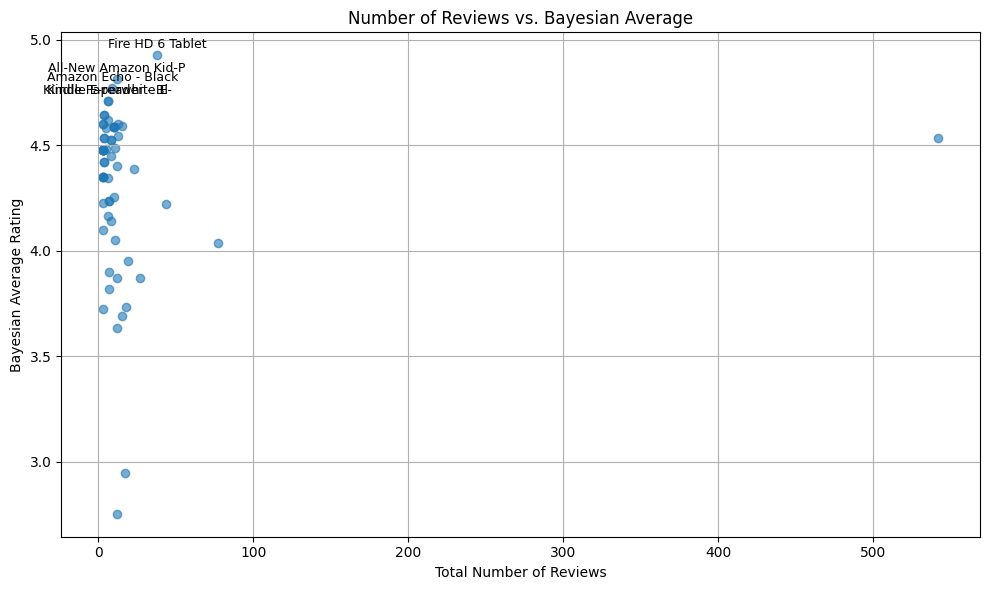

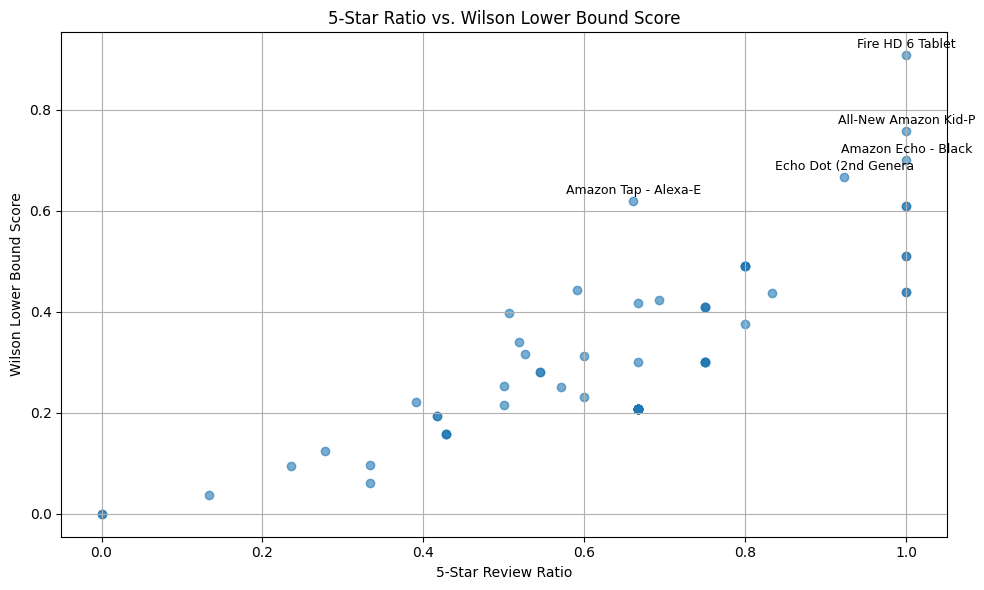

In [20]:
# -------------------------------
# Plot 1: Reviews vs Bayesian Average
# -------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['total_reviews'], df_merged['bayesian_avg'], alpha=0.6)
plt.title('Number of Reviews vs. Bayesian Average')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Bayesian Average Rating')

# Annotate top 5 by Bayesian average
top_bayesian = df_merged.sort_values(by='bayesian_avg', ascending=False).head(5)
for _, row in top_bayesian.iterrows():
    plt.annotate(row['name'][:20],  # truncate long names
                 (row['total_reviews'], row['bayesian_avg']),
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# Plot 2: Wilson Lower Bound vs 5-Star Ratio (with annotations)
# -------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['five_star_ratio'], df_merged['wilson_lower_bound'], alpha=0.6)
plt.title('5-Star Ratio vs. Wilson Lower Bound Score')
plt.xlabel('5-Star Review Ratio')
plt.ylabel('Wilson Lower Bound Score')

# Annotate top 5 products
top_items = df_merged.sort_values(by='wilson_lower_bound', ascending=False).head(5)
for _, row in top_items.iterrows():
    plt.annotate(row['name'][:20],  # first 20 chars of product name
                 (row['five_star_ratio'], row['wilson_lower_bound']),
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()


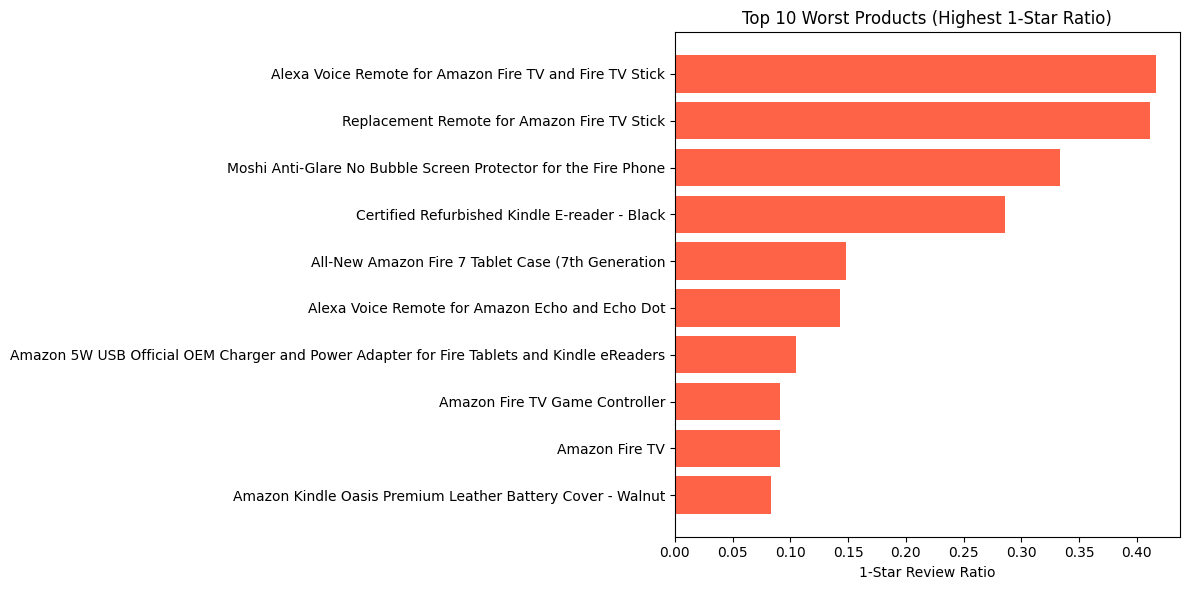

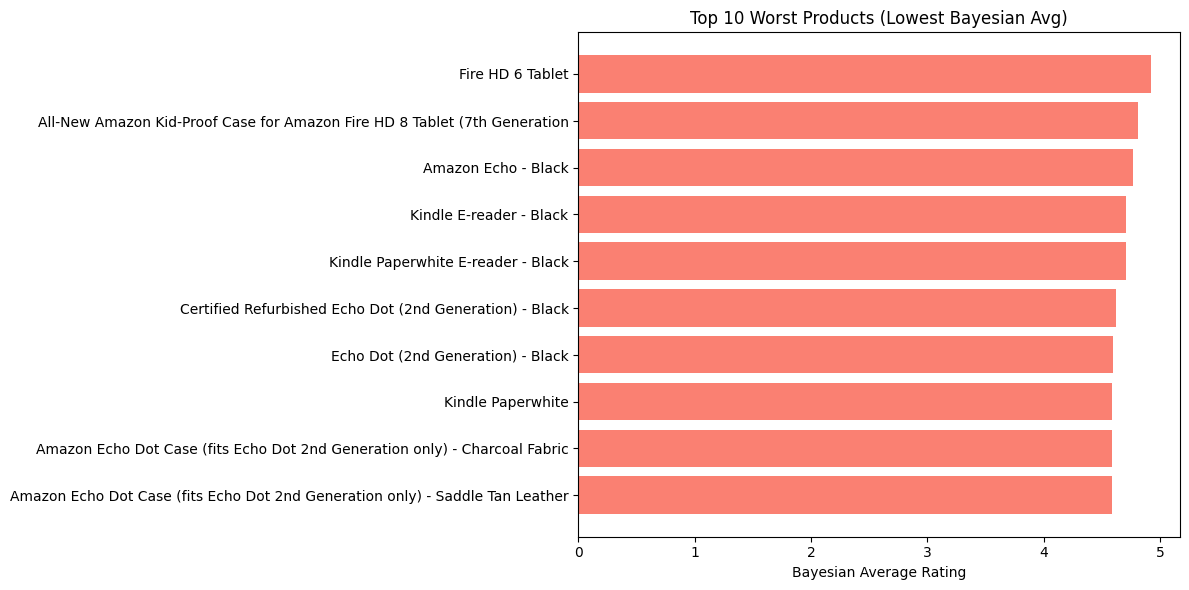

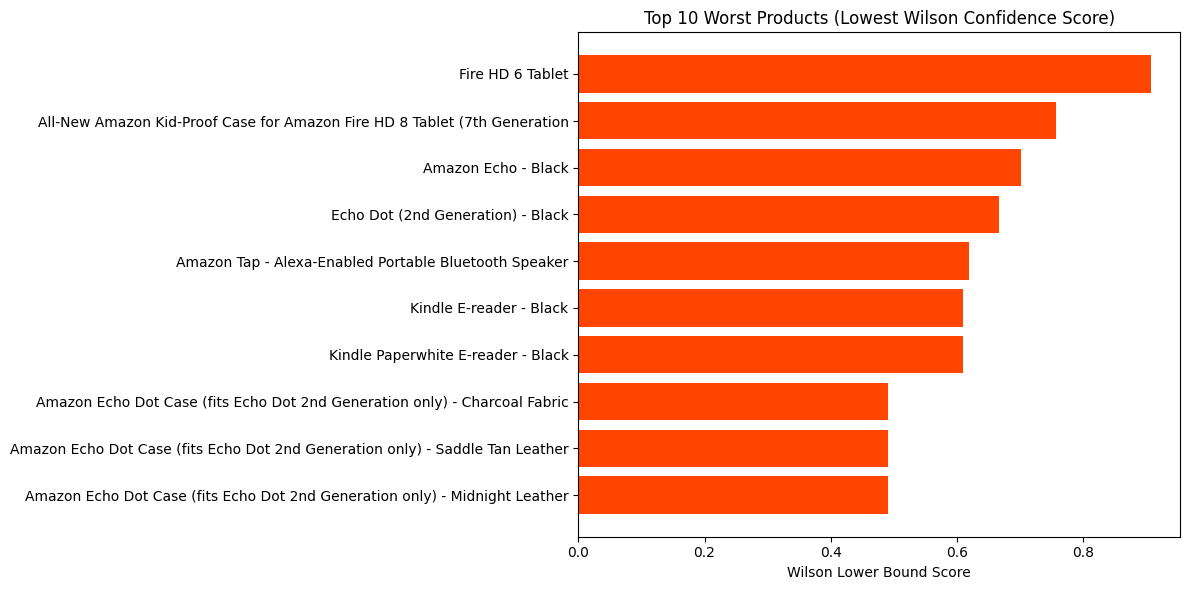

In [21]:
import matplotlib.pyplot as plt

# ---------------------------------------
# Worst by 1-star ratio (high is worse)
# ---------------------------------------
worst_1star = df_merged[df_merged['total_reviews'] >= 5].copy()  # Filter out low-review products
worst_1star = worst_1star.sort_values(by='one_star_ratio', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(worst_1star['name'], worst_1star['one_star_ratio'], color='tomato')
plt.xlabel('1-Star Review Ratio')
plt.title('Top 10 Worst Products (Highest 1-Star Ratio)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ---------------------------------------
# Worst by Bayesian average (low is worse)
# ---------------------------------------
worst_bayesian = df_merged[df_merged['total_reviews'] >= 5].copy()
worst_bayesian = worst_bayesian.sort_values(by='bayesian_avg', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(worst_bayesian['name'], worst_bayesian['bayesian_avg'], color='salmon')
plt.xlabel('Bayesian Average Rating')
plt.title('Top 10 Worst Products (Lowest Bayesian Avg)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ---------------------------------------
# Worst by Wilson Lower Bound (low is worst, but must be > 0)
# ---------------------------------------
worst_wilson = df_merged[(df_merged['total_reviews'] >= 5) & 
                         (df_merged['wilson_lower_bound'] > 0)].copy()
worst_wilson = worst_wilson.sort_values(by='wilson_lower_bound', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(worst_wilson['name'], worst_wilson['wilson_lower_bound'], color='orangered')
plt.xlabel('Wilson Lower Bound Score')
plt.title('Top 10 Worst Products (Lowest Wilson Confidence Score)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Q.2
Understand the people’s sentiment depending on the product price they purchase. 
Segment the price in 10 different tranches based on your preference. 
(i.e. 0 – 10 EUR, 10 – 20EUR, 20 – 50 EUR, 50 – 100 EUR, 100 – 200 EUR, etc.)


In [22]:
df[['prices']]

prices
0     [{"amountMax":139.99,"amountMin":139.99,"curre...
1     [{"amountMax":139.99,"amountMin":139.99,"curre...
2     [{"amountMax":139.99,"amountMin":139.99,"curre...
3     [{"amountMax":139.99,"amountMin":139.99,"curre...
4     [{"amountMax":139.99,"amountMin":139.99,"curre...
...                                                 ...
1592  [{"amountMax":29.99,"amountMin":29.99,"currenc...
1593  [{"amountMax":29.99,"amountMin":29.99,"currenc...
1594  [{"amountMax":29.99,"amountMin":29.99,"currenc...
1595  [{"amountMax":29.99,"amountMin":29.99,"currenc...
1596  [{"amountMax":29.99,"amountMin":29.99,"currenc...

[1177 rows x 1 columns]

In [23]:
# Function to extract price from the JSON format
def extract_price(price_data):
    try:
        # Convert string to Python list of dictionaries
        price_list = ast.literal_eval(price_data)
        
        # Extract price values (choosing amountMax or amountMin)
        if isinstance(price_list, list) and len(price_list) > 0:
            price = price_list[0].get('amountMax', None)  # Use 'amountMax' as primary
            if price is None:
                price = price_list[0].get('amountMin', None)  # Fallback to 'amountMin'
            return price
    except (ValueError, SyntaxError):
        return None  # Return None if parsing fails


In [24]:
# Ensure 'prices' is in the correct format
df['prices'] = df['prices'].astype(str)

# Apply extraction function to prices column
df['price'] = df['prices'].apply(extract_price)

# Convert extracted prices to float
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Define price tranches
price_bins = np.linspace(0, 500, 11)  # Creates 10 equal bins
price_labels = [f"{int(price_bins[i])}-{int(price_bins[i+1])} EUR" for i in range(len(price_bins)-1)]


In [25]:
# Segment prices into bins
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

# Drop rows with missing values in price
df = df.dropna(subset=['price_range', 'reviews.rating'])

# Group by price range and calculate average review rating
price_sentiment = df.groupby('price_range')['reviews.rating'].agg(['count', 'mean']).reset_index()
price_sentiment.rename(columns={'count': 'review_count', 'mean': 'avg_rating'}, inplace=True)

/var/folders/77/wfv9nbcd5t94hwcgvb3vzvwr0000gn/T/ipykernel_2219/371085494.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sentiment = df.groupby('price_range')['reviews.rating'].agg(['count', 'mean']).reset_index()


In [26]:
# Display results
tools.display_dataframe_to_user(name="Sentiment by Price Range", dataframe=price_sentiment)

Sentiment by Price Range


/var/folders/77/wfv9nbcd5t94hwcgvb3vzvwr0000gn/T/ipykernel_2219/1345032560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_sentiment, x='price_range', y='avg_rating', palette='viridis')


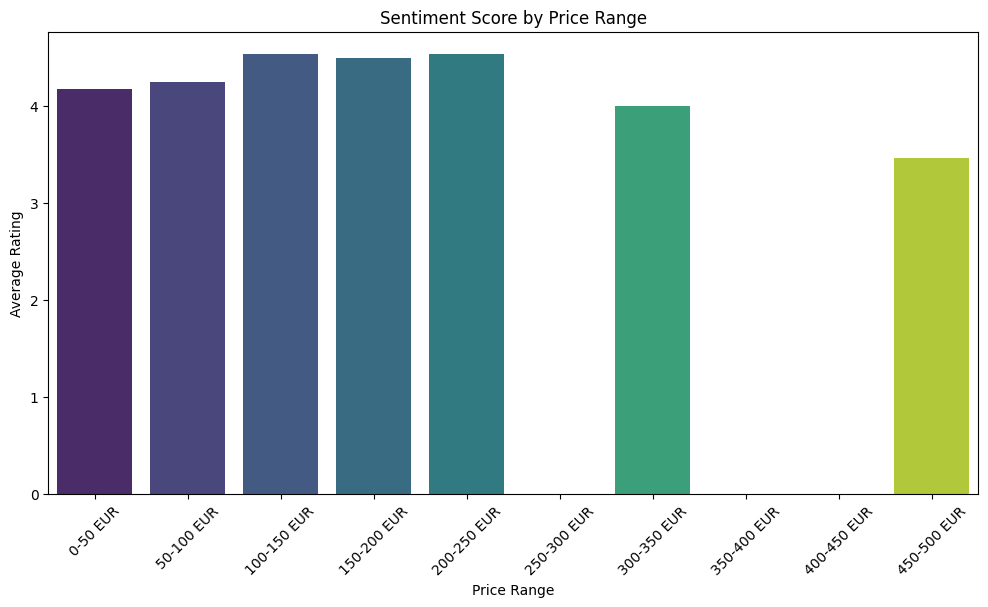

In [27]:
# Visualization: Sentiment Score vs Price Range
plt.figure(figsize=(12, 6))
sns.barplot(data=price_sentiment, x='price_range', y='avg_rating', palette='viridis')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Sentiment Score by Price Range')
plt.xticks(rotation=45)
plt.show()

/var/folders/77/wfv9nbcd5t94hwcgvb3vzvwr0000gn/T/ipykernel_2219/1227563367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='price_range', y='reviews.rating', palette='coolwarm')


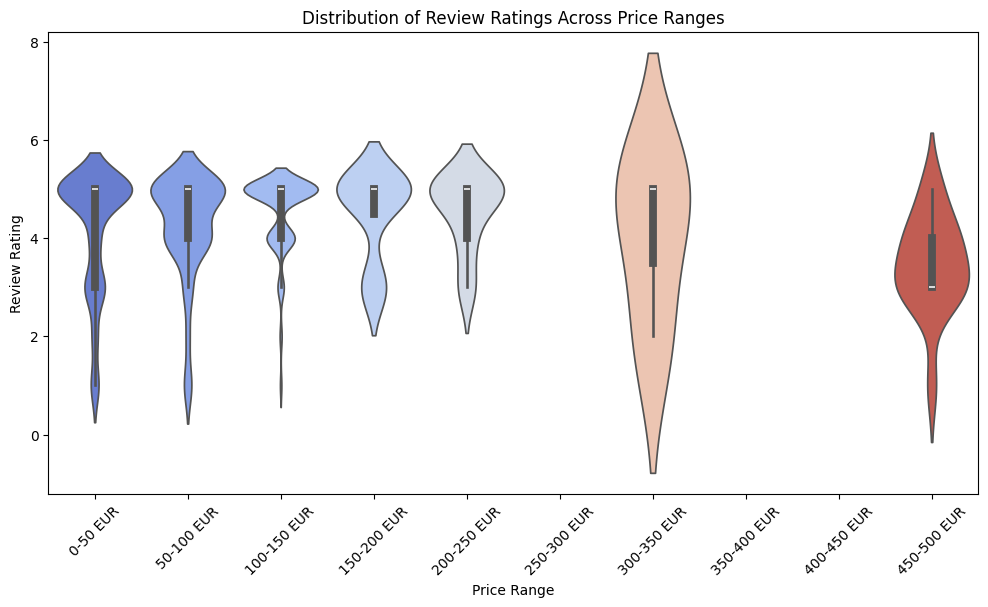

In [28]:
# both distribution and density of ratings in each price range.
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='price_range', y='reviews.rating', palette='coolwarm')
plt.xlabel('Price Range')
plt.ylabel('Review Rating')
plt.title('Distribution of Review Ratings Across Price Ranges')
plt.xticks(rotation=45)
plt.show()


/var/folders/77/wfv9nbcd5t94hwcgvb3vzvwr0000gn/T/ipykernel_1968/2900623520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_range', y='reviews.rating', palette='muted')


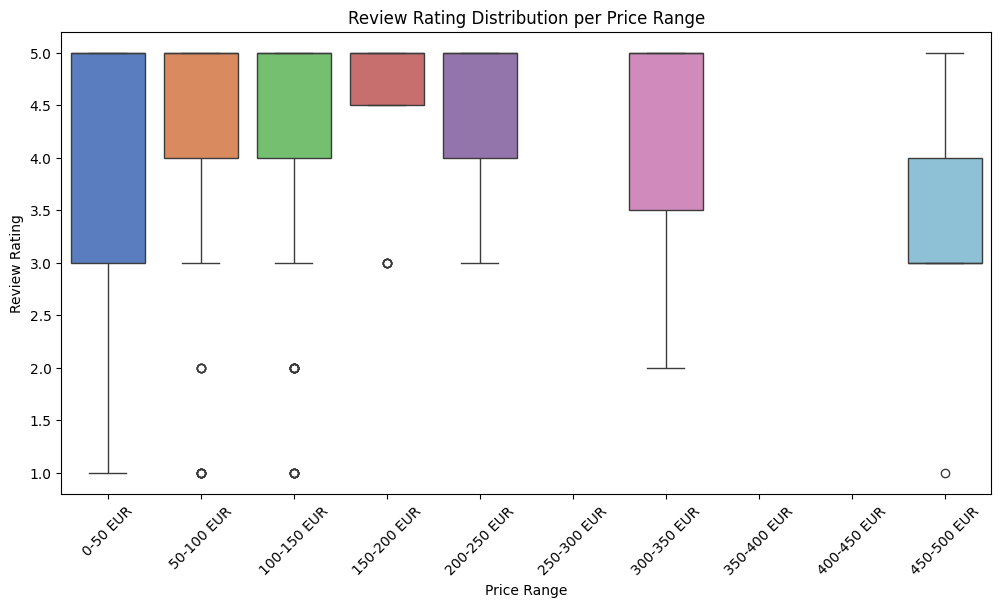

In [64]:
# quick identification of price segments with better or worse ratings.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='price_range', y='reviews.rating', palette='muted')
plt.xlabel('Price Range')
plt.ylabel('Review Rating')
plt.title('Review Rating Distribution per Price Range')
plt.xticks(rotation=45)
plt.show()


### Q.3
Mine “reviews.title” and “reviews.rating”. We want to cluster reviews based on the main key problem / main key benefit.
Why we want to do it: it will help us to send a customized mail 


### To answer the final question, I will perform following steps:
    1. Preprocess review titles.
    2. TF-IDF Vectorization.
    3. Clustering (e.g., KMeans) (Silhouette Score Evaluation).
    4. WordClouds per Cluster

In [32]:
# Convert reviews.rating to float
df['reviews.rating'] = df['reviews.rating'].astype(float)

In [ ]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
X_tfidf = vectorizer.fit_transform(df['reviews.title'])

# Normalize ratings
scaler = MinMaxScaler()
ratings_scaled = scaler.fit_transform(df[['reviews.rating']])  # Shape: (n_samples, 1)

# Combine TF-IDF + scaled rating
X_combined = hstack([X_tfidf, ratings_scaled])

✅ Optimal number of clusters: 9


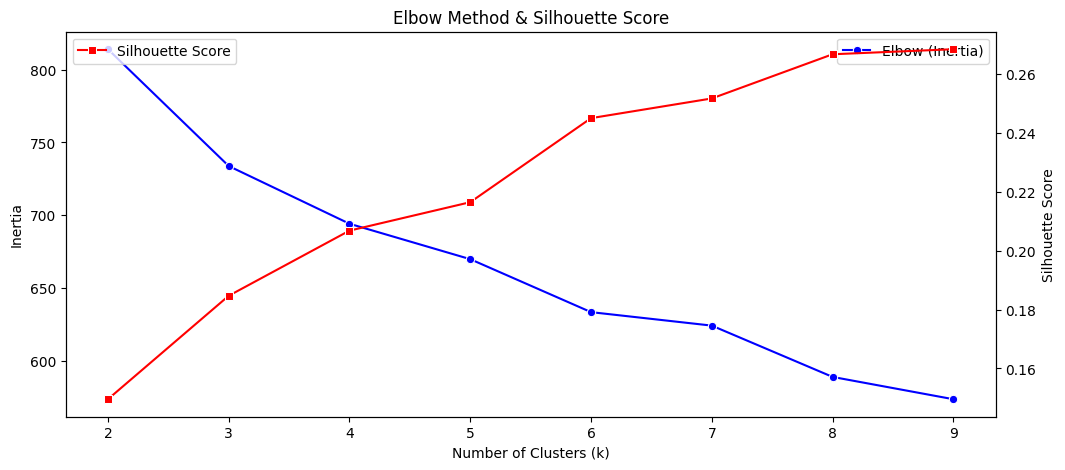


📊 Cluster Summary:
         Review Count  Avg Rating
Cluster                          
0                 580    4.263793
1                 120    4.683333
2                  56    4.607143
3                  25    4.720000
4                  55    4.290909
5                  51    3.882353
6                  67    4.701493
7                 179    4.307263
8                  44    4.545455

🧠 Top Keywords per Cluster:
Cluster 0: great, nice, tablet, alexa, tap, fun, kindle, buy, stars, product
Cluster 1: great, product, tablet, alexa, price, value, case, speaker, good, excellent
Cluster 2: speaker, great, portable, awesome, little, nice, alexa, perfect, excellent, amazon
Cluster 3: awesome, device, alexa, longevity, issue, headphones, product, yes, helpful, hd
Cluster 4: amazon, tap, review, remote, like, great, tablet, helpful, product, updated
Cluster 5: good, speaker, echo, price, product, upgrade, case, works, tablet, great
Cluster 6: love, echo, tap, alexa, hate, works, amazon, p

In [43]:
# --- Clustering Evaluation ---
inertia = []
silhouette_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_tfidf)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_tfidf, labels))

# --- Pick Optimal k ---
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"✅ Optimal number of clusters: {optimal_k}")

# --- Plot Elbow + Silhouette Score ---
fig, ax1 = plt.subplots(figsize=(12, 5))
sns.lineplot(x=list(cluster_range), y=inertia, marker="o", ax=ax1, label="Elbow (Inertia)", color="blue")
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Inertia")
ax1.set_title("Elbow Method & Silhouette Score")
ax1.legend(loc="upper right")

ax2 = ax1.twinx()
sns.lineplot(x=list(cluster_range), y=silhouette_scores, marker="s", ax=ax2, label="Silhouette Score", color="red")
ax2.set_ylabel("Silhouette Score")
ax2.legend(loc="upper left")
plt.show()

# --- Final Clustering ---
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_tfidf)

# --- Cluster Summary: Avg Rating + Count ---
cluster_summary = df.groupby('Cluster')['reviews.rating'].agg(['count', 'mean']).rename(columns={'count': 'Review Count', 'mean': 'Avg Rating'})
print("\n📊 Cluster Summary:")
print(cluster_summary)

# --- Top Keywords per Cluster ---
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("\n🧠 Top Keywords per Cluster:")
top_keywords = {}
for i in range(optimal_k):
    top_words = [terms[ind] for ind in order_centroids[i, :10]]
    top_keywords[i] = top_words
    print(f"Cluster {i}: {', '.join(top_words)}")

# --- Generate Cluster Labels from Top Keywords ---
def generate_cluster_label(keywords, n=3):
    return " ".join(keywords[:n])  # use top 3 words as cluster label

cluster_labels = {i: generate_cluster_label(top_keywords[i]) for i in range(optimal_k)}

# --- Assign Human-Readable Labels ---
df['ClusterLabel'] = df['Cluster'].map(cluster_labels)

# --- View Sample Output ---
print("\n📎 Sample Cluster Labels Assigned:")
print(df[['reviews.title', 'reviews.rating', 'Cluster', 'ClusterLabel']].sample(10))

# --- Update Cluster Summary with Labels ---
cluster_summary['Label'] = cluster_summary.index.map(cluster_labels)
cluster_summary = cluster_summary[['Label', 'Review Count', 'Avg Rating']]
print("\n📊 Cluster Summary with Labels:")
print(cluster_summary.sort_values(by='Avg Rating', ascending=False))

In [41]:
tools.display_dataframe_to_user(name="Clustered Reviews", dataframe=df[['reviews.title', 'reviews.rating', 'Cluster']])

Clustered Reviews


/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


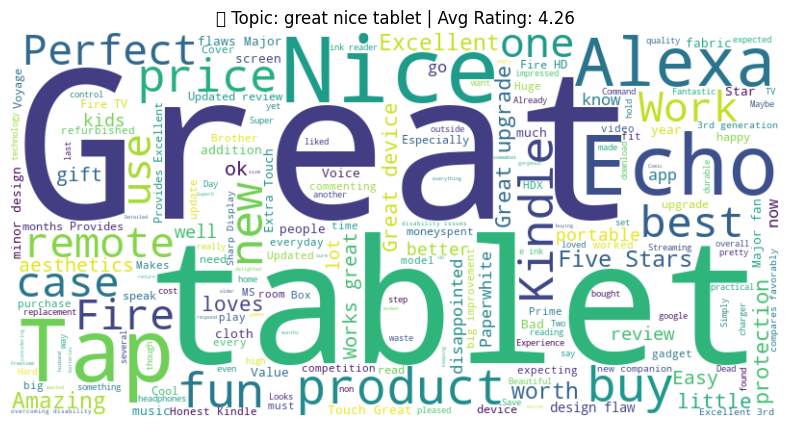

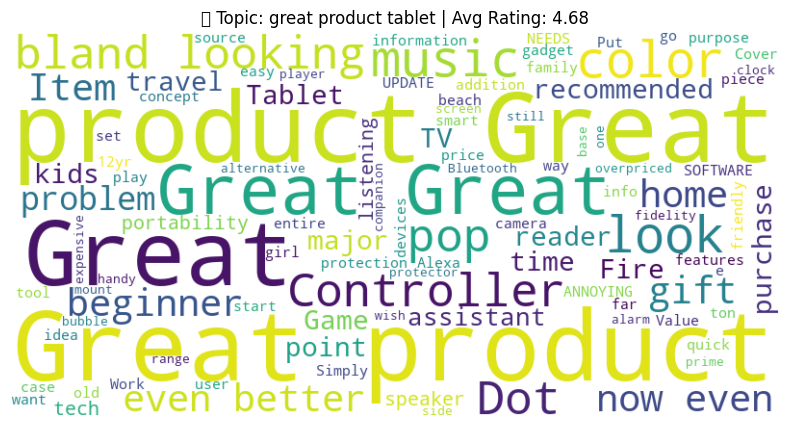

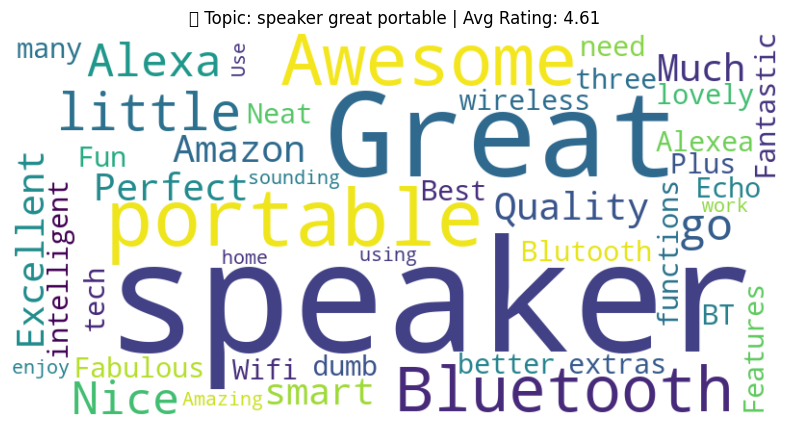

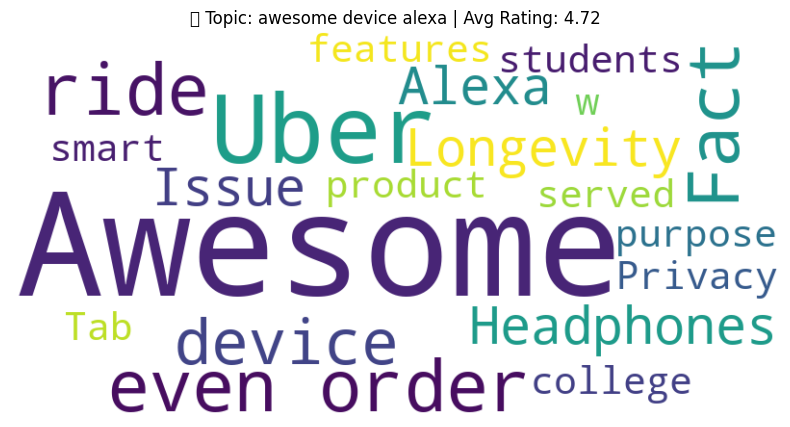

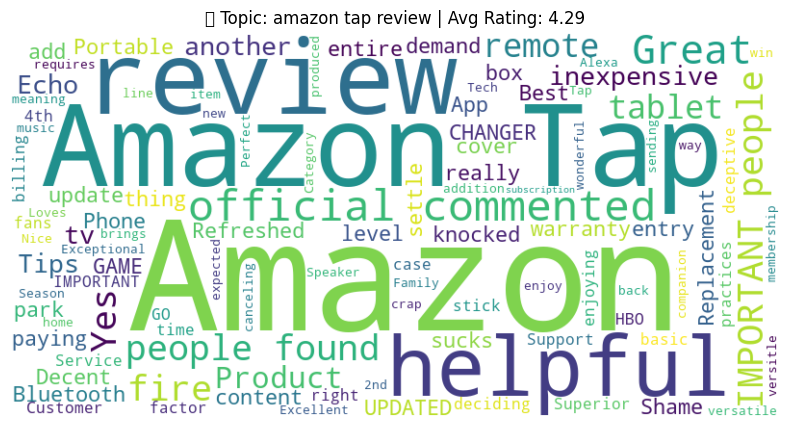

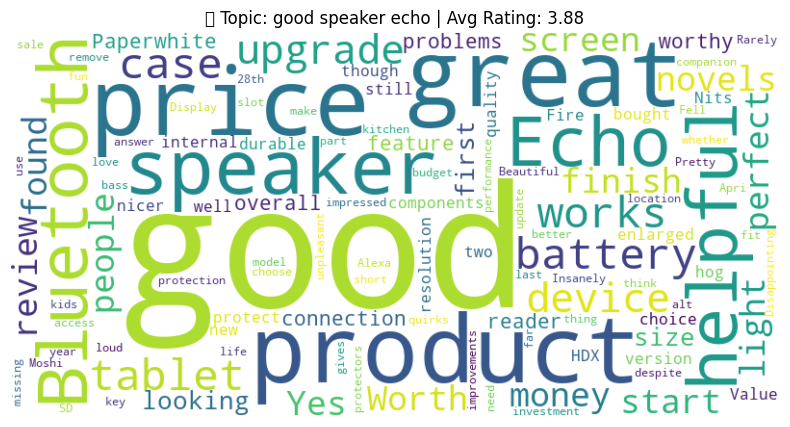

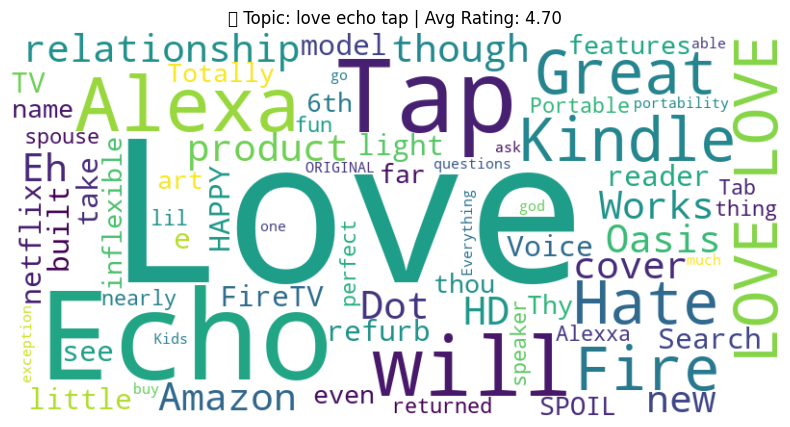

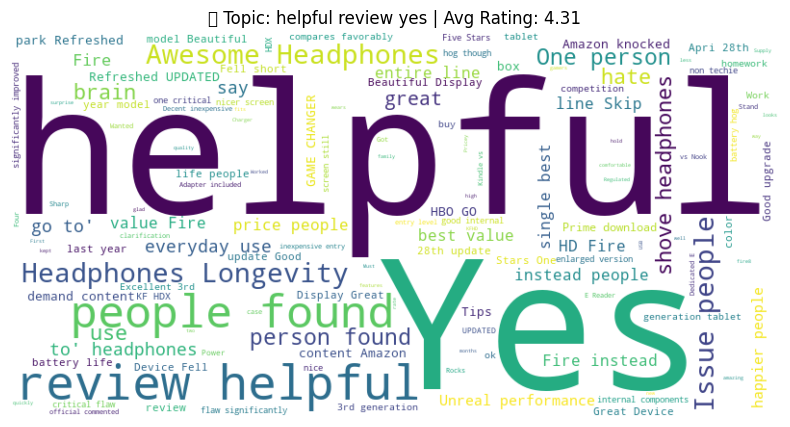

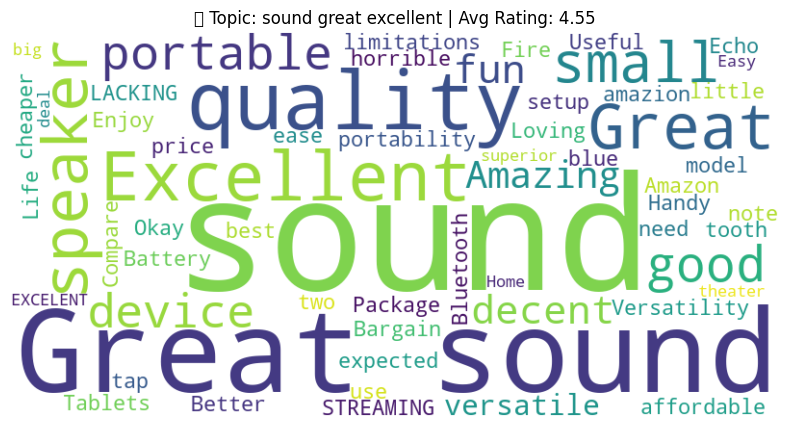


🔍 Topic: great nice tablet | Avg Rating: 4.26
                       reviews.title  reviews.rating
   Nice Tablet with Sharp Display 4,             4.0
My voice remote controller pooed out             2.0
                 Great Portable Echo             5.0
  Updated review (after 2 months)...             4.0
 alexa is amost for every house hold             5.0

🔍 Topic: great product tablet | Avg Rating: 4.68
                                  reviews.title  reviews.rating
Great pop of color for a bland looking product!             5.0
                            Great look for Dot.             5.0
                 Great addition to home devices             5.0
                                  Great product             5.0
                                  Great Product             5.0

🔍 Topic: speaker great portable | Avg Rating: 4.61
        reviews.title  reviews.rating
        Great Speaker             4.0
        Great Speaker             4.0
Great Speaker Quality             5

In [45]:
# --- WordClouds per Cluster (Labeled) ---
for i in range(optimal_k):
    cluster_texts = df[df['Cluster'] == i]['reviews.title']
    cluster_label = cluster_labels[i]  # e.g. "battery charge remote"
    avg_rating = cluster_summary.loc[i, 'Avg Rating']
    
    text = " ".join(cluster_texts.values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"🧾 Topic: {cluster_label} | Avg Rating: {avg_rating:.2f}")
    plt.show()

# --- Sample Titles per Cluster (Labeled) ---
for i in range(optimal_k):
    cluster_label = cluster_labels[i]
    avg_rating = cluster_summary.loc[i, 'Avg Rating']
    
    print(f"\n🔍 Topic: {cluster_label} | Avg Rating: {avg_rating:.2f}")
    
    sample = df[df['Cluster'] == i][['reviews.title', 'reviews.rating']].sample(min(5, len(df[df['Cluster'] == i])))
    print(sample.to_string(index=False))


### Q.4
Mine “reviews.title” and “reviews.rating” for a product (take either “categories” or “name”, whatever you prefer) 
with bad overall rating. We want to understand the main key problems.
Why we want to do it: it will help us to send a customized mail 

### To answer the final question, I will perform following steps:
    1. Filter products with an average rating below a certain threshold (e.g., ≤ 2.5).
    2. Extract reviews.title for those low-rated products.
    3. Perform NLP (TF-IDF & Word Frequency Analysis) to detect key complaint words.
    4. Visualize issues using:
        Word Cloud: Shows most common complaint words.

In [46]:
df

id                                         categories  \
0     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
1     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
2     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
3     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
4     AVpe7AsMilAPnD_xQ78G                         Amazon Devices,mazon.co.uk   
...                    ...                                                ...   
1592  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   
1593  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   
1594  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   
1595  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   
1596  AVpfo9ukilAPnD_xfhuj  Amazon Devices & Accessories,Amazon Device Acc...   

                                                   name  \
0                                     Kindle Paperwhite   
1                                     Kindle Paperwhite   
2                                     Kindle Paperwhite   
3                                     Kindle Paperwhite   
4                                     Kindle Paperwhite   
...                                                 ...   
1592  Alexa Voice Remote for Amazon Fire TV and Fire...   
1593  Alexa Voice Remote for Amazon Fire TV and Fire...   
1594  Alexa Voice Remote for Amazon Fire TV and Fire...   
1595  Alexa Voice Remote for Amazon Fire TV and Fire...   
1596  Alexa Voice Remote for Amazon Fire TV and Fire...   

                                                 prices  \
0     [{"amountMax":139.99,"amountMin":139.99,"curre...   
1     [{"amountMax":139.99,"amountMin":139.99,"curre...   
2     [{"amountMax":139.99,"amountMin":139.99,"curre...   
3     [{"amountMax":139.99,"amountMin":139.99,"curre...   
4     [{"amountMax":139.99,"amountMin":139.99,"curre...   
...                                                 ...   
1592  [{"amountMax":29.99,"amountMin":29.99,"currenc...   
1593  [{"amountMax":29.99,"amountMin":29.99,"currenc...   
1594  [{"amountMax":29.99,"amountMin":29.99,"currenc...   
1595  [{"amountMax":29.99,"amountMin":29.99,"currenc...   
1596  [{"amountMax":29.99,"amountMin":29.99,"currenc...   

                                           reviews.text  \
0     I initially had trouble deciding between the p...   
1     Allow me to preface this with a little history...   
2     I am enjoying it so far. Great for reading. Ha...   
3     I bought one of the first Paperwhites and have...   
4     I have to say upfront - I don't like coroporat...   
...                                                 ...   
1592  This is not the same remote that I got for my ...   
1593  I have had to change the batteries in this rem...   
1594  Remote did not activate, nor did it connect to...   
1595  It does the job but is super over priced. I fe...   
1596  I ordered this item to replace the one that no...   

                                          reviews.title  reviews.rating  \
0                        Paperwhite voyage, no regrets!             5.0   
1                     One Simply Could Not Ask For More             5.0   
2            Great for those that just want an e-reader             4.0   
3                              Love / Hate relationship             5.0   
4                                             I LOVE IT             5.0   
...                                                 ...             ...   
1592  I would be disappointed with myself if i produ...             3.0   
1593                        Battery draining remote!!!!             1.0   
1594      replacing an even worse remote. Waste of time             1.0   
1595                                         Overpriced             3.0   
1596  I am sending all of this crap back to amazon a...             1.0   

       price  price_ran

In [47]:
# Again Ensure 'reviews.rating' is numeric
df['reviews.rating'] = pd.to_numeric(df['reviews.rating'], errors='coerce')

In [48]:
# Step 1.
# Filter products with **low average rating** (threshold: ≤2.5)
low_rated_products = df.groupby('name')['reviews.rating'].mean()
low_rated_products = low_rated_products[low_rated_products <= 2.5].index.tolist()

# Filter reviews for low-rated products
low_rated_reviews = df[df['name'].isin(low_rated_products)]


In [49]:
# Step 2.
# Extract relevant review titles
low_rated_titles = low_rated_reviews['reviews.title'].dropna().astype(str)


In [50]:
# Step 3
# **Word Frequency Analysis**
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_matrix = vectorizer.fit_transform(low_rated_titles)
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_matrix.toarray().sum(axis=0)))

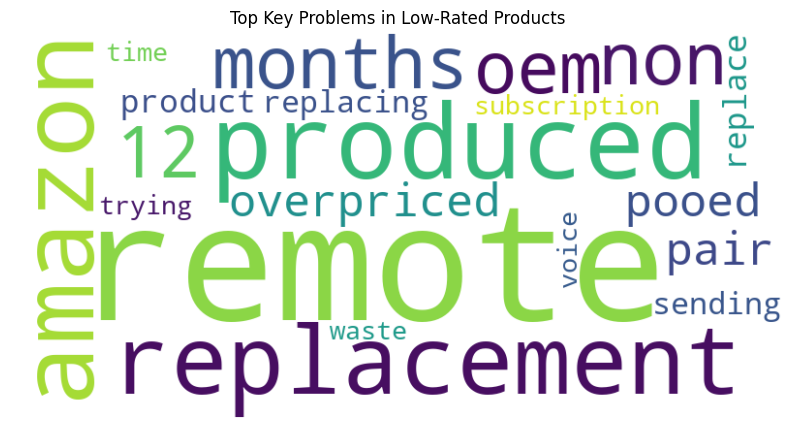

/var/folders/77/wfv9nbcd5t94hwcgvb3vzvwr0000gn/T/ipykernel_2219/4001339052.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Reds_r")


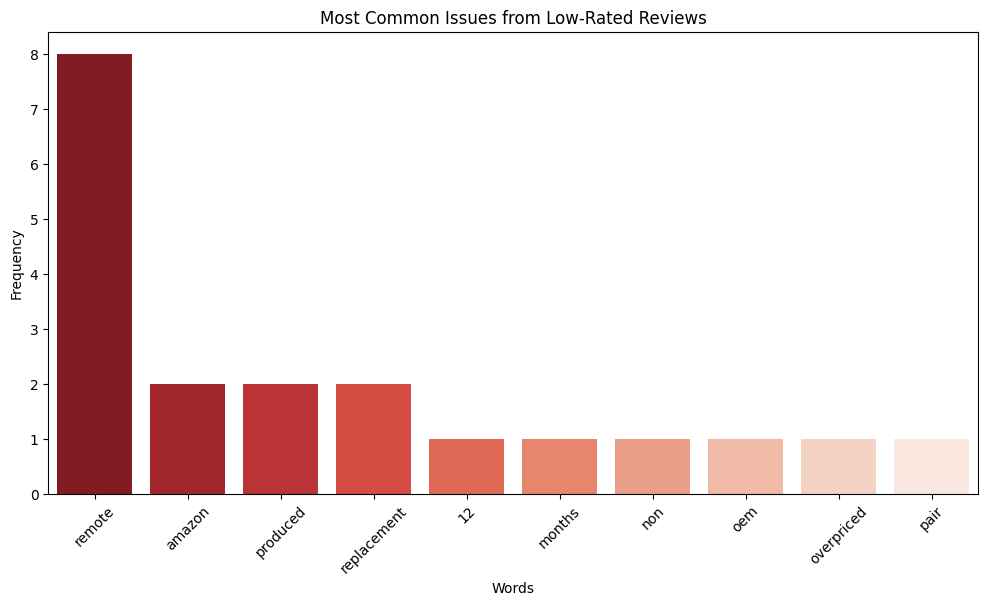

In [52]:
# Step 4.
# **Word Cloud Visualization**
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top Key Problems in Low-Rated Products")
plt.show()

# **Bar Plot of Most Common Complaint Words**
word_freq_sorted = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]  # Top 10 words
words, counts = zip(*word_freq_sorted)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="Reds_r")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Issues from Low-Rated Reviews")
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package punkt to /Users/ryoji/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/ryoji/nltk_data...


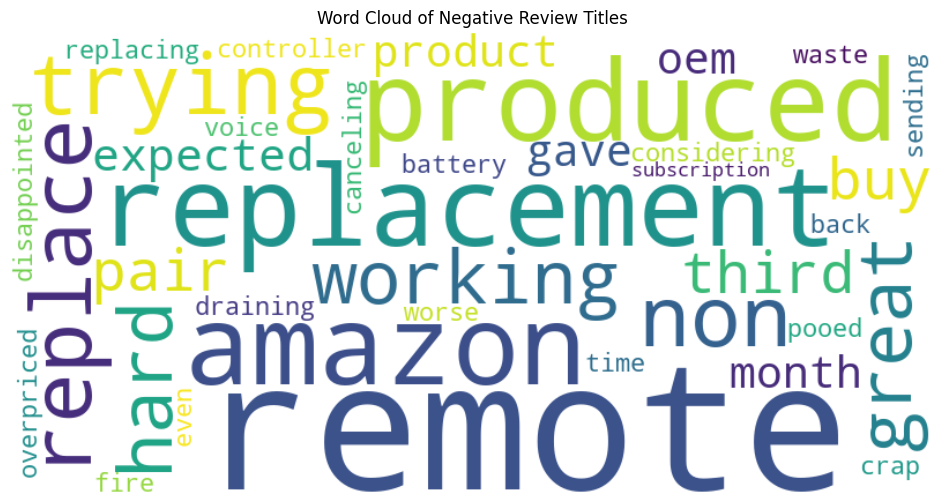

/var/folders/77/wfv9nbcd5t94hwcgvb3vzvwr0000gn/T/ipykernel_1968/3721467068.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tfidf_df.head(10), x='importance', y='word', palette='Reds_r')


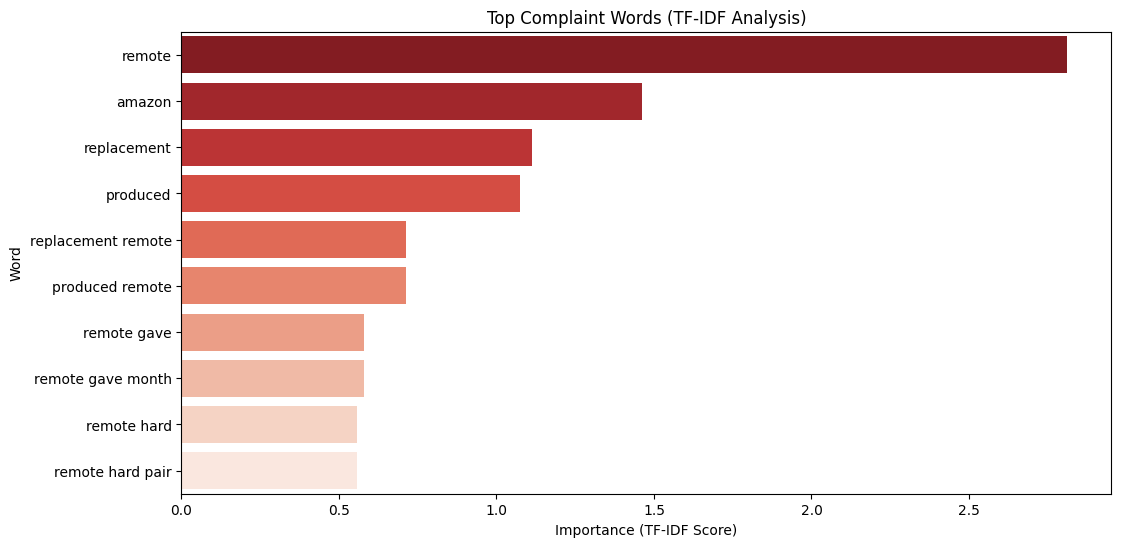

Low Rated Product Reviews


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('wordnet')

# Load dataset (Assuming df is already loaded)
# Step 1: Compute the average rating per product
df_avg_rating = df.groupby(['categories', 'name'])['reviews.rating'].mean().reset_index(name='avg_rating')

# Step 2: Identify low-rated products (avg rating ≤ 2.5)
low_rated_products = df_avg_rating[df_avg_rating['avg_rating'] <= 2.5]

# Step 3: Extract reviews for these low-rated products
df_low_reviews = df[df['name'].isin(low_rated_products['name'])]

# Select only relevant columns
df_low_reviews = df_low_reviews[['name', 'categories', 'reviews.title', 'reviews.rating']].dropna()

# Step 4: Preprocess review titles
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha()]
    return " ".join(tokens)

df_low_reviews['processed_title'] = df_low_reviews['reviews.title'].apply(preprocess_text)

# Step 5: Analyze key complaints using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words='english', max_features=30)
tfidf_matrix = vectorizer.fit_transform(df_low_reviews['processed_title'])
tfidf_feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF results to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names).sum().reset_index()
tfidf_df.columns = ['word', 'importance']
tfidf_df = tfidf_df.sort_values(by='importance', ascending=False)

# Step 6: Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_low_reviews['processed_title']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Negative Review Titles")
plt.show()

# Step 7: Plot Top Complaint Words
plt.figure(figsize=(12, 6))
sns.barplot(data=tfidf_df.head(10), x='importance', y='word', palette='Reds_r')
plt.xlabel("Importance (TF-IDF Score)")
plt.ylabel("Word")
plt.title("Top Complaint Words (TF-IDF Analysis)")
plt.show()

# Step 8: Display Processed Data
tools.display_dataframe_to_user(name="Low Rated Product Reviews", dataframe=df_low_reviews)